# **CIÊNCIA DE DADOS** - DCA3501

UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE, NATAL/RN

DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO

(C) 2025-2026 CARLOS M D VIEGAS

https://github.com/cmdviegas

# Estatística Descritiva

Este notebook apresenta os principais comandos do `pandas` para calcular medidas de tendência central, dispersão e posição, bem como relações entre variáveis.

### Tabela: Comandos do `pandas` para Estatística Descritiva

| Categoria              | Medida              | Comando                                                        |
|------------------------|---------------------|-----------------------------------------------------------------------|
| **Tendência Central**  | Média               | `df['coluna'].mean()`                                                |
|                        | Mediana             | `df['coluna'].median()`                                              |
|                        | Moda                | `df['coluna'].mode()`                                                |
|                        | Média Ponderada     | `np.average(df['coluna'], weights=pesos)`                            |
| **Dispersão**          | Variância           | `df['coluna'].var()`                                                 |
|                        | Desvio Padrão       | `df['coluna'].std()`                                                 |
|                        | Amplitude           | `df['coluna'].max() - df['coluna'].min()`                            |
|                        | Coef. de Variação   | `(df['coluna'].std() / df['coluna'].mean()) * 100`                   |
| **Posição**            | Quartil (genérico)  | `df['coluna'].quantile(q)`                                           |
|                        | Q1, Q2, Q3          | `df['coluna'].quantile([0.25, 0.5, 0.75])`                            |
|                        | Estatísticas resumo | `df['coluna'].describe()`                                            |
|                        | Percentil           | `df['coluna'].quantile(x/100)`                                       |
|                        | Z-score             | `(df['coluna'] - df['coluna'].mean()) / df['coluna'].std()`          |
|                        | IQR (Q3-Q1)  | `df['coluna'].quantile(0.75) - df['coluna'].quantile(0.25)`          |
| **Relação entre variáveis**            | Covariância | `df.cov()`                                           |
|              | Correlação de Pearson (padrão)  | `df.corr()` ou `df.corr(method=pearson)`                                            |
|                           | Correlação de Spearman   | `df.corr(method=spearman)`                                           |

In [21]:
# Importação das bibliotecas
import pandas as pd
import numpy as np

# Leitura do dataset
df = pd.read_csv("https://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv", sep=';')

df

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
0,15370,FERNANDO MOREIRA DA SILVA,1209923,2013,2,14,9.17,1.34,8.13,2.70,7.61,2.53
1,15370,FERNANDO MOREIRA DA SILVA,1222008,2014,1,15,9.44,0.92,7.17,3.08,8.71,1.72
2,15370,FERNANDO MOREIRA DA SILVA,1222218,2014,1,38,9.19,1.67,6.77,3.29,8.12,2.53
3,15370,FERNANDO MOREIRA DA SILVA,1229520,2014,2,13,9.06,1.16,7.68,2.51,7.62,2.77
4,15370,FERNANDO MOREIRA DA SILVA,1229545,2014,2,24,9.27,1.28,8.45,1.72,8.48,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...
179084,5764160,ESTEFANI PONTES SIMAO,57746512,2024,2,37,9.83,0.95,9.92,0.37,NaN,NaN
179085,5764160,ESTEFANI PONTES SIMAO,57746526,2024,2,40,9.92,0.42,9.81,0.69,NaN,NaN
179086,5764162,ARTHUR CARVALHO MELO,57745278,2024,2,45,9.81,0.60,9.52,0.99,NaN,NaN
179087,5764162,ARTHUR CARVALHO MELO,57745280,2024,2,23,9.88,0.45,9.61,0.97,NaN,NaN


In [22]:
dados = df.loc[df['nome_docente'] == 'NOME_DO_PROFESSOR', 'atuacao_profissional_media']

dados

Series([], Name: atuacao_profissional_media, dtype: float64)

In [23]:
# Agrupamento pelo nome do docente
# e calculando a média das notas para cada um
df_docentes = df.groupby('nome_docente').agg(
    postura_profissional_media=('postura_profissional_media', 'mean'),
    atuacao_profissional_media=('atuacao_profissional_media', 'mean'),
    autoavaliacao_aluno_media=('autoavaliacao_aluno_media', 'mean'),
    
    qtd_total_discentes=('qtd_discentes', 'sum'),
    postura_profissional_DP_media=('postura_profissional_DP', 'mean'),
    atuacao_profissional_DP_media=('atuacao_profissional_DP', 'mean'),
    autoavaliacao_aluno_DP_media=('autoavaliacao_aluno_DP', 'mean'),
    
    # Contagem de quantas turmas cada docente lecionou no dataset
    num_turmas=('id_turma', 'count')
).reset_index()

print("DataFrame unificado por docente:\n")
print(df_docentes.head())

DataFrame unificado por docente:

                                 nome_docente  postura_profissional_media  \
0                            ABDO FARRET NETO                    9.739474   
1                   ABINADABE JACKSON DE MELO                    9.392308   
2                  ABMAEL BEZERRA DE OLIVEIRA                    9.589167   
3               ABNER MONTEIRO NUNES CORDEIRO                    9.322000   
4  ABRAHAO SANDERSON NUNES FERNANDES DA SILVA                    8.710256   

   atuacao_profissional_media  autoavaliacao_aluno_media  qtd_total_discentes  \
0                    9.536842                   9.604386                  682   
1                    9.203077                        NaN                  470   
2                    8.996111                   8.691212                 1115   
3                    9.049000                        NaN                  543   
4                    8.617692                   8.853810                 1144   

   postura_profi

# Exercícios práticos

### Exercício 1 - Quais são as médias gerais das avaliações dos docentes?

Calcular a **média, mediana e moda** das seguintes variáveis:

- `postura_profissional_media`

- `atuacao_profissional_media`

- `autoavaliacao_aluno_media`

Interpretar: os docentes tendem a ser bem avaliados? As notas se concentram próximas do topo?

In [24]:
colunas_avaliacao = [
    'postura_profissional_media', 
    'atuacao_profissional_media', 
    'autoavaliacao_aluno_media'
]
# Dict para armazenar os resultados
medidas_centrais = {}
for coluna in colunas_avaliacao:
    media = df_docentes[coluna].mean()
    mediana = df_docentes[coluna].median()
    moda = df_docentes[coluna].mode()[0] # Pega o primeiro valor da moda, caso haja mais de um
    medidas_centrais[coluna] = {'Média': media, 'Mediana': mediana, 'Moda': moda}

# Converte o dicionário em um DataFrame para melhor visualização
df_medidas_centrais = pd.DataFrame(medidas_centrais)

print("Medidas de Tendência Central:\n")
print(df_medidas_centrais)

Medidas de Tendência Central:

         postura_profissional_media  atuacao_profissional_media  \
Média                      9.329137                    9.057093   
Mediana                    9.450000                    9.121034   
Moda                       9.450000                    9.100000   

         autoavaliacao_aluno_media  
Média                     8.934869  
Mediana                   8.886875  
Moda                      8.860000  


### Interpretação

A proximidade entre a média e a mediana sugere que a distribuição das notas é relativamente simétrica, sem muitos valores extremamente baixos puxando a média para baixo. E isso também é perceptível pelos valores de média estando bem alto, se concentrando próximo ao topo.

### Exercício 2 - As avaliações são consistentes ou variam muito?

Calcular:

- `Desvio padrão`

- `Amplitude` 

- `Coeficiente de variação`

Analisar:

- Em qual dimensão há maior variação entre turmas?

- O que isso pode indicar sobre o critério de avaliação dos alunos?

In [25]:
# Dict para armazenar os resultados de dispersão
medidas_dispersao = {}
for coluna in colunas_avaliacao:
    desvio_padrao = df_docentes[coluna].std()
    amplitude = df_docentes[coluna].max() - df_docentes[coluna].min()
    coef_variacao = (desvio_padrao / df_docentes[coluna].mean()) * 100 # pra deixar em %
    medidas_dispersao[coluna] = {
        'Desvio Padrão': desvio_padrao, 
        'Amplitude': amplitude, 
        'Coef. de Variação (%)': coef_variacao
    }

df_medidas_dispersao = pd.DataFrame(medidas_dispersao)

print("Medidas de Dispersão:\n")
print(df_medidas_dispersao)

Medidas de Dispersão:

                       postura_profissional_media  atuacao_profissional_media  \
Desvio Padrão                            0.482464                    0.524439   
Amplitude                                7.180000                    5.831667   
Coef. de Variação (%)                    5.171584                    5.790364   

                       autoavaliacao_aluno_media  
Desvio Padrão                           0.410419  
Amplitude                               2.565000  
Coef. de Variação (%)                   4.593454  


### Interpretação
 A maior variação está na amplitude do `postura_profissional_media` e que por conta do desvio padrão baixo e um coeficiente de variação pequeno, os alunos estão avaliando de forma bastante consistentes entre si.


### Exercício 3 - Como estão distribuídas as avaliações dos docentes?

Calcular:

- Quartis (Q1, Q2, Q3)

- Percentis (10, 25, 75, 90)

- Mediana

Perguntas:

- Qual é a nota mínima entre os 25% mais mal avaliados?

- As notas estão concentradas no topo? (ex: Q3 próximo de 10)

- Existe assimetria? A mediana está próxima da média?

In [26]:
percentis = [0.10, 0.25, 0.5, 0.75, 0.90]
distribuicao_notas = df_docentes[colunas_avaliacao].describe(percentiles=percentis).round(2)

print("Distribuição das Avaliações\n")
print(distribuicao_notas)

Distribuição das Avaliações

       postura_profissional_media  atuacao_profissional_media  \
count                     5133.00                     5133.00   
mean                         9.33                        9.06   
std                          0.48                        0.52   
min                          2.82                        4.16   
10%                          8.72                        8.43   
25%                          9.13                        8.80   
50%                          9.45                        9.12   
75%                          9.66                        9.41   
90%                          9.78                        9.63   
max                         10.00                       10.00   

       autoavaliacao_aluno_media  
count                    4241.00  
mean                        8.93  
std                         0.41  
min                         7.44  
10%                         8.45  
25%                         8.66  
50%       

### Interpretação
* O menor valor de 25% é de 8.66 da `autoavaliacao_aluno_media` 
* Já o Q3 está com valores altos nas 3 avaliações (9.66, 9.41, 9.20)
* E a mediana (Q2) está bem próxima da média, sendo uma distribuição bem simétrica, como comentado no Exercício 1

### Exercício 4 - Qual é a nota mais comum dada pelos alunos para cada dimensão?

Calcular:

- Moda

In [27]:
# Calculando a moda para cada dimensão
moda_avaliacoes = df[colunas_avaliacao].mode()
moda_avaliacoes2 = df_docentes[colunas_avaliacao].mode()
print("Nota mais comum para cada dimensão do DF separado:\n")
print(moda_avaliacoes)
print("\nNota mais comum para cada dimensão do DF unificado:\n")
print(moda_avaliacoes2)

Nota mais comum para cada dimensão do DF separado:

   postura_profissional_media  atuacao_profissional_media  \
0                        10.0                        10.0   

   autoavaliacao_aluno_media  
0                       10.0  

Nota mais comum para cada dimensão do DF unificado:

   postura_profissional_media  atuacao_profissional_media  \
0                        9.45                         9.1   

   autoavaliacao_aluno_media  
0                       8.86  


### Interpretação
Aqui coloquei os 2 dataframes para mostrar justamente essa diferença nos valores, causado pelas médias das avaliações 

### Exercício 5 - Quais docentes tiveram avaliações muito acima ou abaixo da média geral?

Calcular:

- Z-score para a média de postura profissional

In [28]:
# O cálculo do Z-score
df_docentes['z_score_postura'] = (df_docentes['postura_profissional_media'] - df_docentes['postura_profissional_media'].mean()) / df_docentes['postura_profissional_media'].std()

# Docentes com avaliações mais atípicas (Z-score > 2 ou < -2)
docentes_atipicos = df_docentes[ (df_docentes['z_score_postura'] > 2) | (df_docentes['z_score_postura'] < -2) ]

print("Docentes com média de postura profissional muito acima ou abaixo da média dos outros docentes:\n")
print(docentes_atipicos[['nome_docente', 'postura_profissional_media', 'z_score_postura']])


Docentes com média de postura profissional muito acima ou abaixo da média dos outros docentes:

                               nome_docente  postura_profissional_media  \
23             ADERSON FARIAS DO NASCIMENTO                    8.175294   
63    ADRIANO HENRIQUE DO NASCIMENTO RANGEL                    8.357419   
104                ALBERTO DE PONTES JARDIM                    7.887692   
114            ALDO ALOISIO DANTAS DA SILVA                    7.991667   
126                    ALESSANDRA PIO SILVA                    8.217692   
...                                     ...                         ...   
5048     WAGNER WALKER DE ALBUQUERQUE ALVES                    7.659444   
5090           WILLIAM FERNANDES DE QUEIROZ                    8.242903   
5113                   YURI DE LIMA PADILHA                    8.048000   
5124              ZILMAR RODRIGUES DE SOUZA                    8.260000   
5125            ZIVANILSON TEIXEIRA E SILVA                    8.287714   

   

### Interpretação
* Um Z-score de +2 significa que o docente foi avaliado 2 desvios padrão acima da média (uma avaliação excepcionalmente boa);
* Um Z-score de -2 indica uma avaliação 2 desvios padrão abaixo (excepcionalmente baixa em comparação com os outros);

Esta análise ajuda a identificar casos extremos que podem merecer atenção, onde a UFRN poderia dar uma olhada e talvez atuar em cima.

### Exercício 6 - As avaliações de postura profissional, atuação profissional e autoavaliação dos alunos se movem juntas?

Calcular correlação de Pearson e Spearman entre:

- `postura_profissional_media`

- `atuacao_profissional_media`

- `autoavaliacao_aluno_media`

O que essas correlações indicam? As três dimensões de avaliação dos docentes — postura profissional, atuação profissional e autoavaliação pelos alunos — tendem a crescer ou diminuir juntas?

In [29]:
# Seleção apenas das colunas de avaliação
df_avaliacoes_docentes = df_docentes[colunas_avaliacao]

# Cálculo da correlação de Pearson
correlacao_pearson = df_avaliacoes_docentes.corr(method='pearson')

# Cálculo da correlação de Spearman
correlacao_spearman = df_avaliacoes_docentes.corr(method='spearman')

print("Correlação de Pearson:\n", correlacao_pearson)
print("\nCorrelação de Spearman:\n", correlacao_spearman)

Correlação de Pearson:
                             postura_profissional_media  \
postura_profissional_media                    1.000000   
atuacao_profissional_media                    0.756990   
autoavaliacao_aluno_media                     0.532047   

                            atuacao_profissional_media  \
postura_profissional_media                     0.75699   
atuacao_profissional_media                     1.00000   
autoavaliacao_aluno_media                      0.67073   

                            autoavaliacao_aluno_media  
postura_profissional_media                   0.532047  
atuacao_profissional_media                   0.670730  
autoavaliacao_aluno_media                    1.000000  

Correlação de Spearman:
                             postura_profissional_media  \
postura_profissional_media                    1.000000   
atuacao_profissional_media                    0.789348   
autoavaliacao_aluno_media                     0.571435   

                           

### Interpretação
Como podemos ver a correlação, pelos dois métodos, mostram a boa relação entre `postura_profissional_media` e `atuacao_profissional_media`, já em outras estão para moderadas para boa (0.5 à 0.6). E por conta disso podemos afirmar que o crescimento dessas 3 dimensões acontecem juntas.

### Exercício 7 - O número de alunos avaliando influencia a dispersão (DP) das notas?

Verificar a correlação entre:

`qtd_discentes` e `postura_profissional_DP`

`qtd_discentes` e `atuacao_profissional_DP`

`qtd_discentes` e `autoavaliacao_aluno_DP`

Há evidências de que turmas maiores produzem avaliações mais estáveis (menor DP)?

In [30]:
# Colunas de interesse para correlação
colunas_dispersao_docentes = [
    'qtd_total_discentes', 
    'postura_profissional_DP_media', 
    'atuacao_profissional_DP_media', 
    'autoavaliacao_aluno_DP_media'
]

# Calculando a correlação
correlacao_discentes_dp = df_docentes[colunas_dispersao_docentes].corr(method='pearson')
print("Correlação entre o total de discentes de um docente e a dispersão média de suas notas:\n")

print(correlacao_discentes_dp.loc['qtd_total_discentes'])


Correlação entre o total de discentes de um docente e a dispersão média de suas notas:

qtd_total_discentes              1.000000
postura_profissional_DP_media    0.009818
atuacao_profissional_DP_media   -0.030073
autoavaliacao_aluno_DP_media    -0.045759
Name: qtd_total_discentes, dtype: float64


### Interpretação
A partir dos dados, a correlação está muito próxima de 0, logo não podemos afirmar que quanto mais ou menos alunos poderia afetar as notas das avaliações. Porém, há melhores formas de verificar isso, olhando por centro de departamento, pois há diversos profissionais que podem estar tendo seus valores escondidos pela média.

### Exercício 8 - Como essas variáveis se comportam ao longo dos anos?

Agrupar por ano e calcular correlação média das dimensões de avaliação para observar tendências.

Há mudanças no comportamento dos alunos ou na percepção sobre os docentes ao longo dos anos?

Escolha dois docentes, preferencialmente com maior quantidade de amostras, para poder analisar essa tendência.

Analisando os docentes: JOSSANA MARIA DE SOUZA FERREIRA, SAMUEL XAVIER DE SOUZA


Gráfico 'analise_docentes.png' com os três plots foi salvo com sucesso.


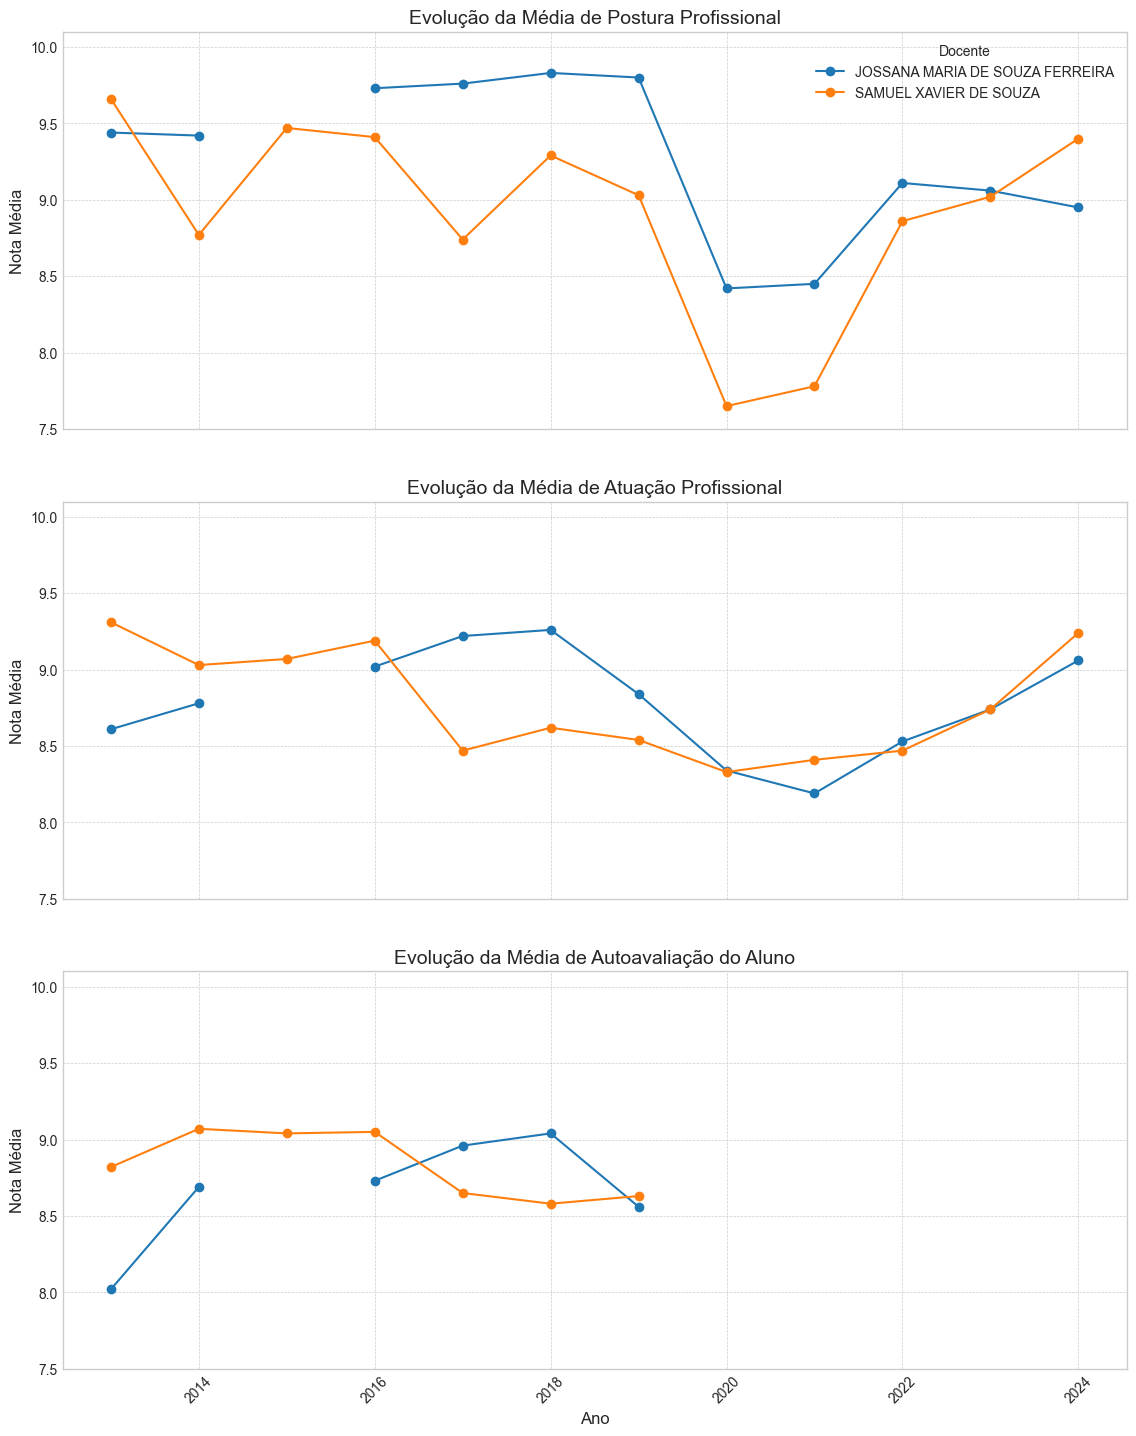

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Seleção dos Docentes
docentes_para_analisar = [
    "JOSSANA MARIA DE SOUZA FERREIRA", 
    "SAMUEL XAVIER DE SOUZA"
]
print(f"Analisando os docentes: {', '.join(docentes_para_analisar)}\n")

df_docentes_escolhidos = df[df['nome_docente'].isin(docentes_para_analisar)]

tendencia_anual_completa = df_docentes_escolhidos.groupby(['nome_docente', 'ano']).agg(
    media_postura=('postura_profissional_media', 'mean'),
    media_atuacao=('atuacao_profissional_media', 'mean'),
    media_autoavaliacao=('autoavaliacao_aluno_media', 'mean'),
    num_turmas=('id_turma', 'count')
).round(2)

# print("Tendência de avaliação anual completa para os docentes escolhidos:\n")
# print(tendencia_anual_completa)

# Preparação dos dados para os 3 gráficos, pivotando para facilitar o plot
df_plot_postura = tendencia_anual_completa['media_postura'].unstack(level='nome_docente')
df_plot_atuacao = tendencia_anual_completa['media_atuacao'].unstack(level='nome_docente')
df_plot_autoavaliacao = tendencia_anual_completa['media_autoavaliacao'].unstack(level='nome_docente')


# Criação da figura com os 3 Subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)
plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Postura Profissional
for professor in df_plot_postura.columns:
    ax1.plot(df_plot_postura.index, df_plot_postura[professor], marker='o', label=professor)
ax1.set_title('Evolução da Média de Postura Profissional', fontsize=14)
ax1.set_ylabel('Nota Média', fontsize=12)
ax1.legend(title='Docente')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 2: Atuação Profissional
for professor in df_plot_atuacao.columns:
    ax2.plot(df_plot_atuacao.index, df_plot_atuacao[professor], marker='o', label=professor)
ax2.set_title('Evolução da Média de Atuação Profissional', fontsize=14)
ax2.set_ylabel('Nota Média', fontsize=12)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 3: Autoavaliação do Aluno
for professor in df_plot_autoavaliacao.columns:
    ax3.plot(df_plot_autoavaliacao.index, df_plot_autoavaliacao[professor], marker='o', label=professor)
ax3.set_title('Evolução da Média de Autoavaliação do Aluno', fontsize=14)
ax3.set_xlabel('Ano', fontsize=12)
ax3.set_ylabel('Nota Média', fontsize=12)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustes dos limites do eixo Y
ax1.set_ylim(7.5, 10.1)
ax2.set_ylim(7.5, 10.1)
ax3.set_ylim(7.5, 10.1)

ax3.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)

plt.savefig('analise_docentes.png', dpi=300, bbox_inches='tight')
print("\nGráfico 'analise_docentes.png' com os três plots foi salvo com sucesso.")

### Interpetação
Como pode ser visto nesses dois docentes (que gosto muito) ambos tiveram uma grande queda na média de profissional durante o período de pandemia, mas a atuação, que também teve uma queda, foi bem menos impactante. A partir disso podemos ver sobre como a questão de ir para o remoto afetou tanto os alunos como os docentes e isso pode ter ajudado a criar um certo efeito dominó na qualidade do ensino como um todo e isso poderia ser visto melhor caso houvessem os dados das autoavaliações dos alunos nos últimos anos.